In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from zipfile import ZipFile

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os # accessing directory structure

In [2]:
file_name = "./Kaggle_CreditCardFraudDetection.zip"

zf = ZipFile(file_name) 
creditcard_df = pd.read_csv(zf.open('creditcard.csv'))

## QUESTION: how is the zip file closed?

In [4]:
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# creditcard_df['Minutes'] = creditcard_df.Time/60.
# creditcard_df['Hours'] = creditcard_df.Minutes/60.

In [6]:
# Note: Time == Number of seconds elapsed between the first transaction and this transaction
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no null values

In [9]:
print("Total None values:", creditcard_df.isna().any().sum())

Total None values: 0


In [10]:
creditcard_df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

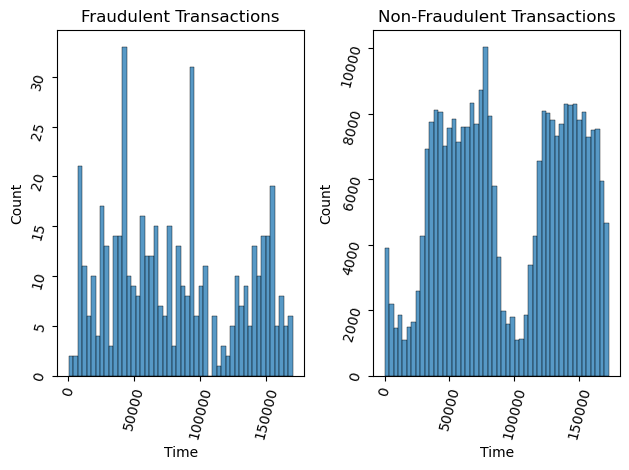

In [11]:
fig, axes = plt.subplots(1,2)
trans_plots = []
trans_plots.append(sns.histplot(creditcard_df["Time"][creditcard_df.Class == 1], bins=50, ax=axes[0]))
trans_plots[0].set_title("Fraudulent Transactions")
trans_plots[0].tick_params(labelrotation=75)
trans_plots.append(sns.histplot(creditcard_df["Time"][creditcard_df.Class == 0], bins=50, ax=axes[1]))
trans_plots[1].set_title("Non-Fraudulent Transactions")
trans_plots[1].tick_params(labelrotation=75)
#plt.subplots_adjust(hspace=0.5)
fig.tight_layout(h_pad=2)
plt.show();

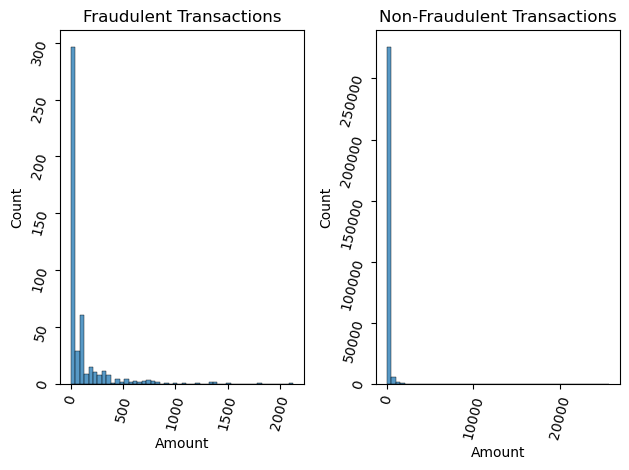

In [12]:
fig, axes = plt.subplots(1,2)
trans_plots = []
trans_plots.append(sns.histplot(creditcard_df["Amount"][creditcard_df.Class == 1], bins=50, ax=axes[0]))
trans_plots[0].set_title("Fraudulent Transactions")
trans_plots[0].tick_params(labelrotation=75)
trans_plots.append(sns.histplot(creditcard_df["Amount"][creditcard_df.Class == 0], bins=50, ax=axes[1]))
trans_plots[1].set_title("Non-Fraudulent Transactions")
trans_plots[1].tick_params(labelrotation=75)
#plt.subplots_adjust(hspace=0.5)
fig.tight_layout(h_pad=2)
plt.show();

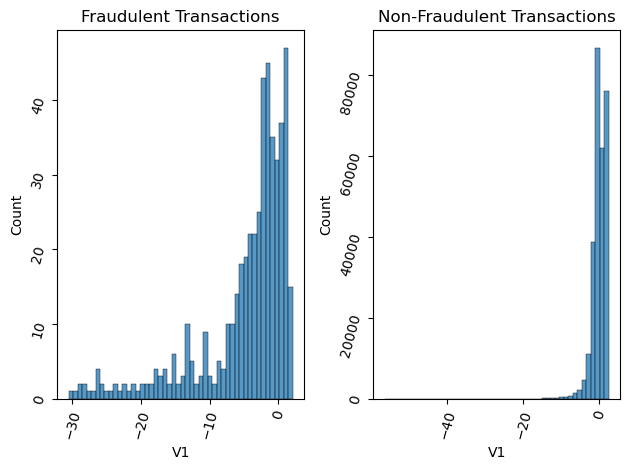

In [13]:
fig, axes = plt.subplots(1,2)
trans_plots = []
trans_plots.append(sns.histplot(creditcard_df["V1"][creditcard_df.Class == 1], bins=50, ax=axes[0]))
trans_plots[0].set_title("Fraudulent Transactions")
trans_plots[0].tick_params(labelrotation=75)
trans_plots.append(sns.histplot(creditcard_df["V1"][creditcard_df.Class == 0], bins=50, ax=axes[1]))
trans_plots[1].set_title("Non-Fraudulent Transactions")
trans_plots[1].tick_params(labelrotation=75)
#plt.subplots_adjust(hspace=0.5)
fig.tight_layout(h_pad=2)
plt.show();

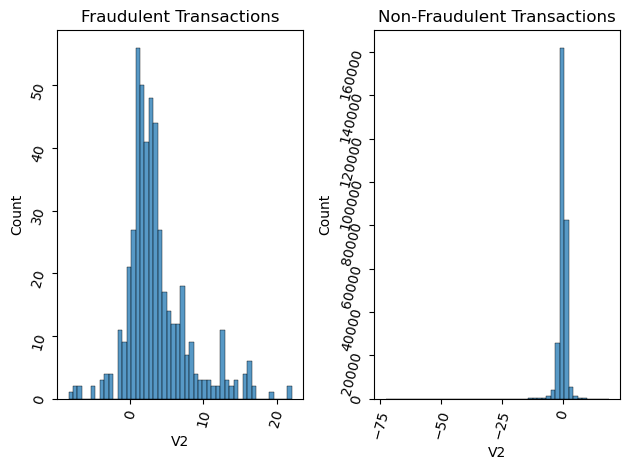

In [14]:
fig, axes = plt.subplots(1,2)
trans_plots = []
trans_plots.append(sns.histplot(creditcard_df["V2"][creditcard_df.Class == 1], bins=50, ax=axes[0]))
trans_plots[0].set_title("Fraudulent Transactions")
trans_plots[0].tick_params(labelrotation=75)
trans_plots.append(sns.histplot(creditcard_df["V2"][creditcard_df.Class == 0], bins=50, ax=axes[1]))
trans_plots[1].set_title("Non-Fraudulent Transactions")
trans_plots[1].tick_params(labelrotation=75)
#plt.subplots_adjust(hspace=0.5)
fig.tight_layout(h_pad=2)
plt.show();

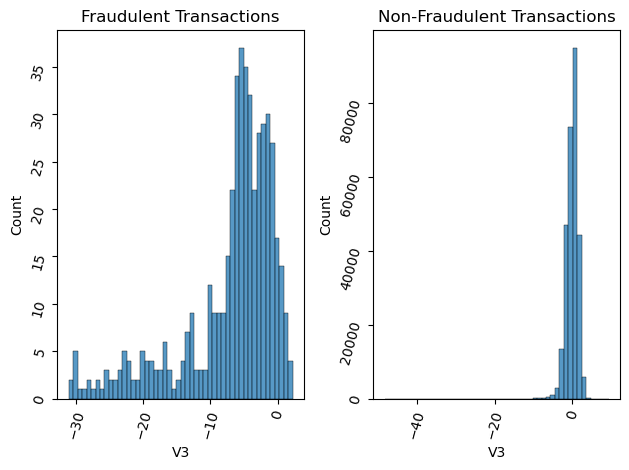

In [15]:
fig, axes = plt.subplots(1,2)
trans_plots = []
trans_plots.append(sns.histplot(creditcard_df["V3"][creditcard_df.Class == 1], bins=50, ax=axes[0]))
trans_plots[0].set_title("Fraudulent Transactions")
trans_plots[0].tick_params(labelrotation=75)
trans_plots.append(sns.histplot(creditcard_df["V3"][creditcard_df.Class == 0], bins=50, ax=axes[1]))
trans_plots[1].set_title("Non-Fraudulent Transactions")
trans_plots[1].tick_params(labelrotation=75)
#plt.subplots_adjust(hspace=0.5)
fig.tight_layout(h_pad=2)
plt.show();

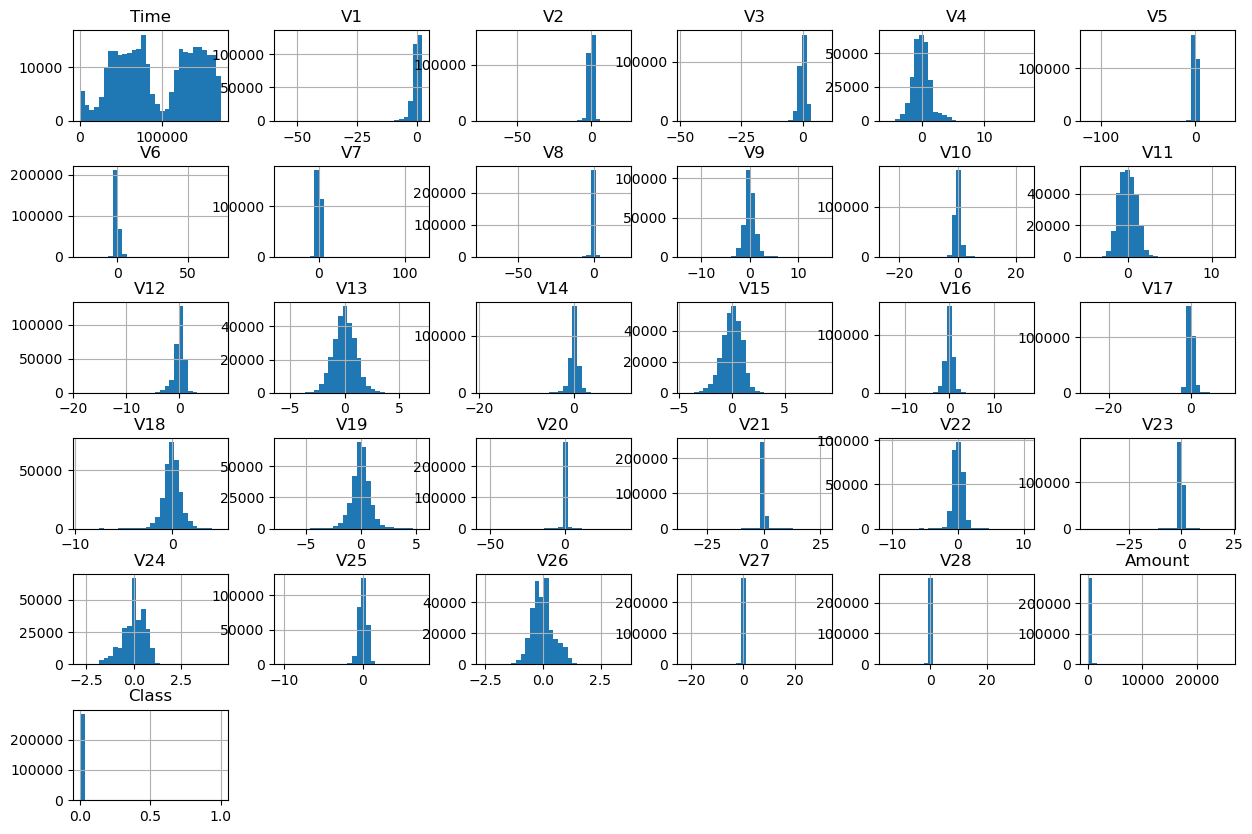

In [16]:
## Distributions of All Transactions
creditcard_df.hist(bins=30, figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

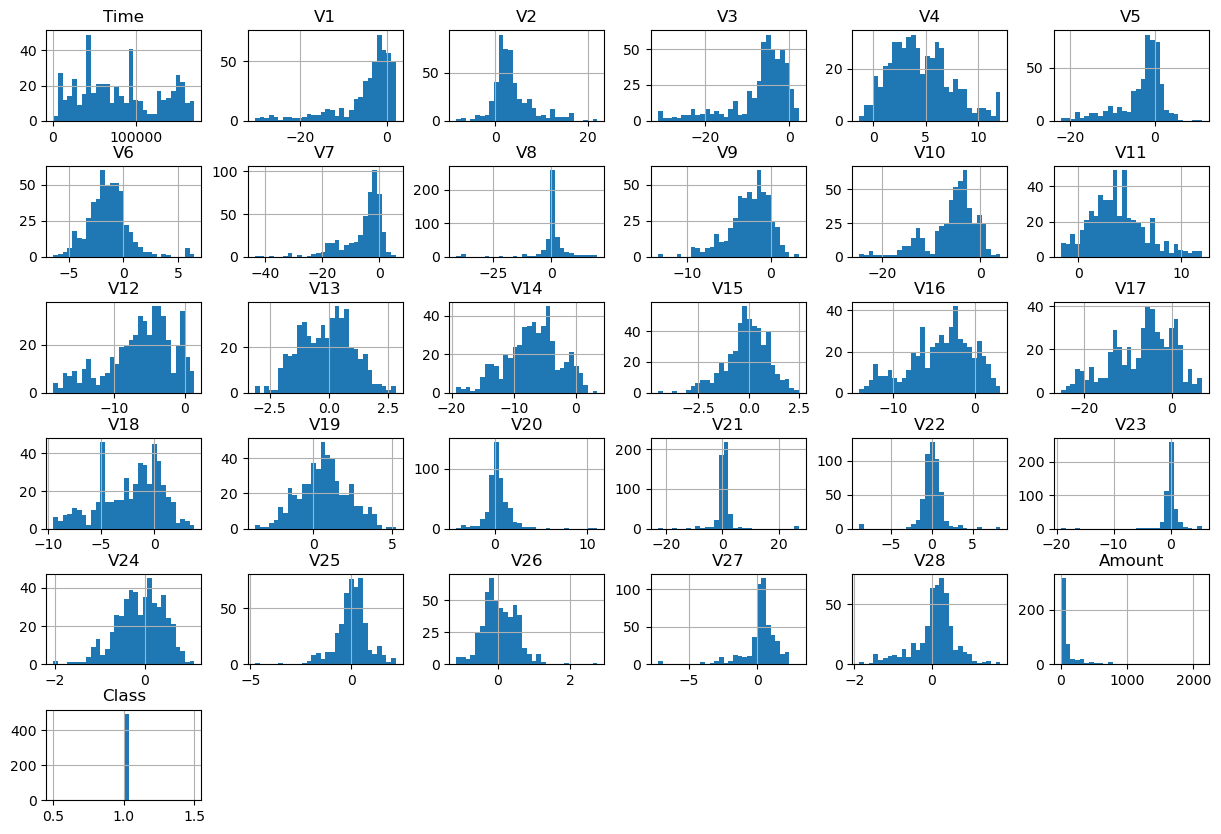

In [17]:
## Distributions of fraudulent Transactions
creditcard_df[creditcard_df.Class == 1].hist(bins=30, figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

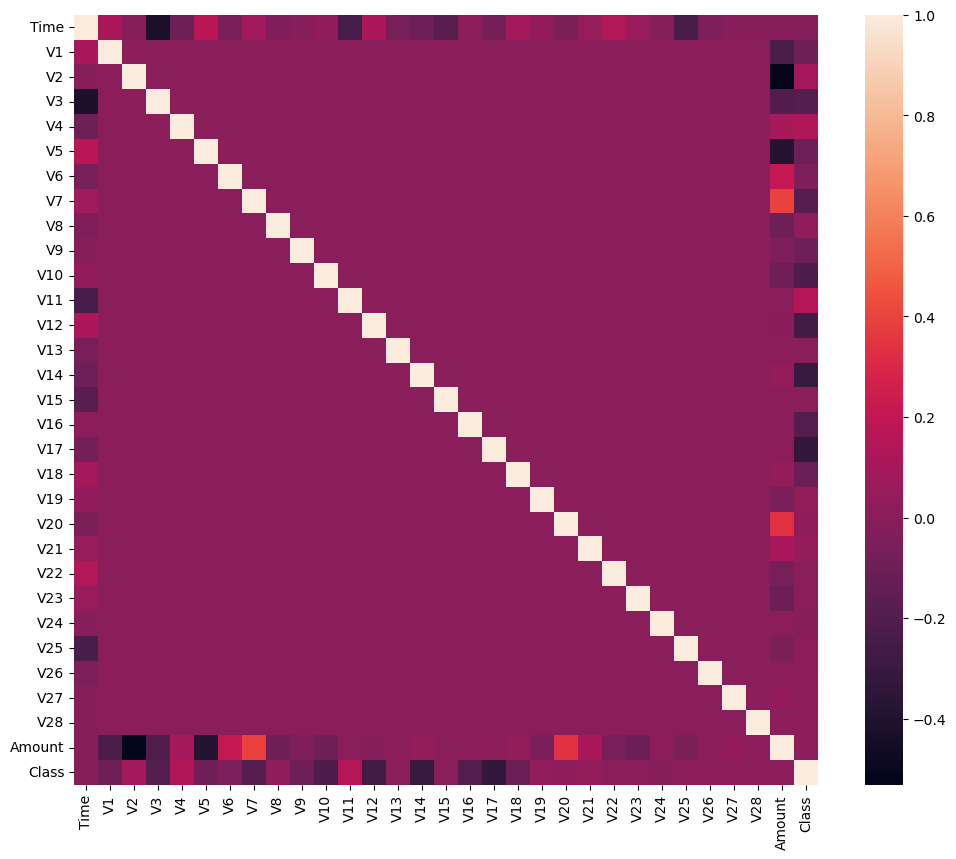

In [18]:
plt.subplots(figsize=(12,10))
sns.heatmap(creditcard_df.corr());

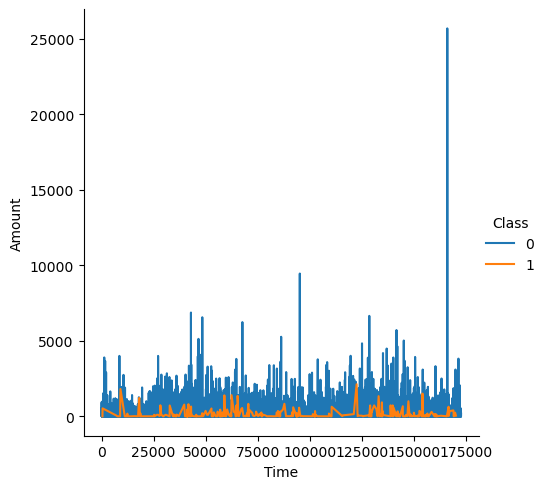

In [20]:
sns.relplot(data=creditcard_df, kind="line", x="Time", y="Amount", hue="Class", errorbar=None)

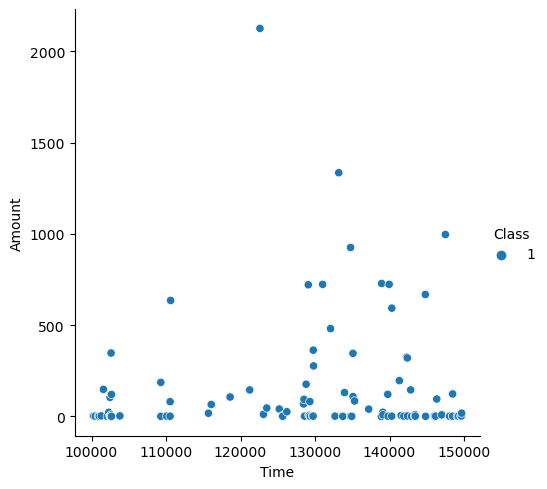

In [21]:
sns.relplot(data=creditcard_df[(creditcard_df.Class==1) & \
                               (creditcard_df.Time > 100000) & \
                              (creditcard_df.Time < 150000)], x="Time", y="Amount", hue="Class") #, kind='line', errorbar=None)

In [22]:
count_by_second = pd.DataFrame(creditcard_df.groupby(['Time','Class'])['Amount'].count().sort_values(ascending=False))
count_by_second.reset_index(inplace=True)
count_by_second.columns=['Seconds','Class','Count']
count_by_second
count_by_second[(count_by_second.Count >= 2) & (count_by_second.Class == 1)]

,Seconds,Class,Count
2709,68207.0,1,6
17994,94362.0,1,4
18027,93853.0,1,4
18028,93860.0,1,4
18029,93879.0,1,4
18385,84204.0,1,4
18423,85285.0,1,4
60027,148053.0,1,2


Number of fraudulent transactions/second does not seem useful. It must take more than one second to complete a transaction. A rolling window would be a better way to look at clusters of transactions.

In [23]:
#creditcard_df[(creditcard_df.Time == 138193) and (creditcard_df.Class == 1)]
creditcard_df[(creditcard_df.Time == 94362)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
151006,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.0,1
151007,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.0,1
151008,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.0,1
151009,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.0,1


In [ ]:
so.Plot(creditcard_df, x="Time", color="Class").add(so.Bar(), so.Count(), so.Dodge())

In [ ]:
creditcard_df[(creditcard_df.Amount > 0) & (creditcard_df.Class == 1)].groupby(['Class','Amount','Time'])['Time'].count().sort_values(ascending=False)

In [ ]:
creditcard_df[(creditcard_df.Amount > 0) & (creditcard_df.Class == 1)].groupby(['Amount'])['Amount'].count().sort_values(ascending=False)

In [ ]:
creditcard_df[creditcard_df.Amount == 0]

In [ ]:
creditcard_df['Amount'][creditcard_df.Class == 1].sort_values(['Amount'], ascending=False).groupby[]